In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

c:\Users\owner\anaconda3\envs\hyper3d\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dg_intensity = np.load("C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/calibration/intensity_dg.npy")

In [3]:
dg_intensity_21 = dg_intensity[2]

In [4]:
white_box_p = np.array([0.000045513,0.00011785,0.000450827,0.00192969,0.00646062,0.0121806,0.00988155,
0.00384551,0.0012909,0.00158269,0.00342962,0.0048454,0.00536611,0.00552526,0.00547096,0.00517708,
0.00465882,0.00409307,0.00335211,0.00229322,0.00148828,0.00177185,0.0041034,0.00914754,0.00845859,
0.00202013,0.00049117,0.000153816,0.0000572871
])

In [5]:
white_box_p.shape

(29,)

In [6]:
white_box_p_21 = white_box_p[2:-2]

In [7]:
white_box_p_21.shape

(25,)

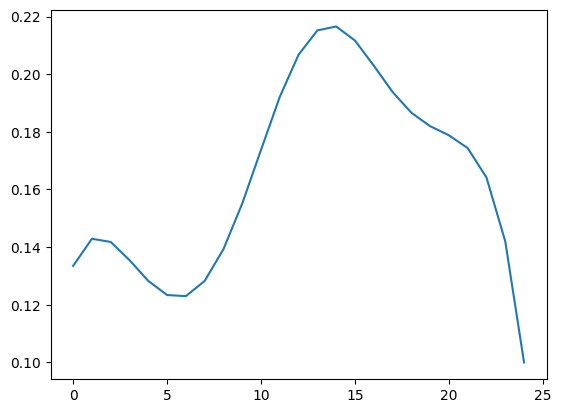

In [8]:
plt.plot(dg_intensity_21)

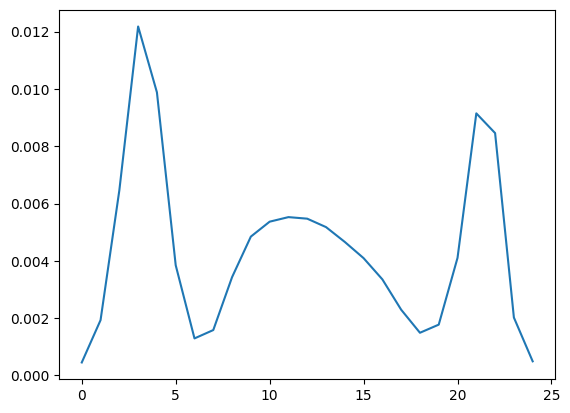

In [9]:
plt.plot(white_box_p_21)

In [10]:
# PE = white_box_p_21 * dg_intensity_21
PE = white_box_p_21

In [11]:
PE

array([0.00045083, 0.00192969, 0.00646062, 0.0121806 , 0.00988155,
       0.00384551, 0.0012909 , 0.00158269, 0.00342962, 0.0048454 ,
       0.00536611, 0.00552526, 0.00547096, 0.00517708, 0.00465882,
       0.00409307, 0.00335211, 0.00229322, 0.00148828, 0.00177185,
       0.0041034 , 0.00914754, 0.00845859, 0.00202013, 0.00049117])

In [12]:
import cv2

In [13]:
img = cv2.imread("C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/calibration/dispersion_20ms_crf_experiment.png")
img = cv2.imread("C:/Users/owner/Documents/GitHub/Scalable-Hyp-3D-Imaging/calibration/dispersion_200ms_0426.png", -1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img/65535.

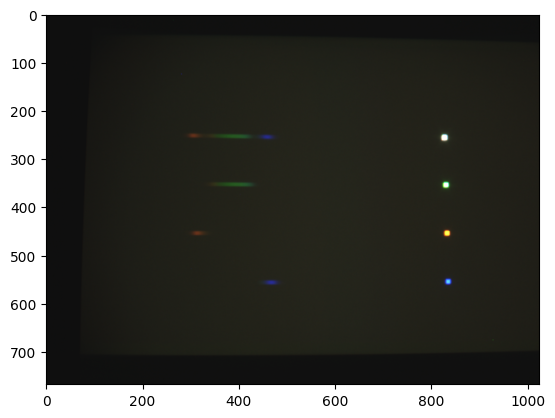

In [14]:
plt.imshow(img)

In [15]:
dat_from_white = img[244:264,292:480]
dat_from_black = img[274:294,292:480]
dat_from_white_mean = dat_from_white.mean(axis =0)
dat_from_black_mean = dat_from_black.mean(axis=0)

In [16]:
dat_white_final = dat_from_white_mean - dat_from_black_mean

In [17]:
dat_white_final.shape

(188, 3)

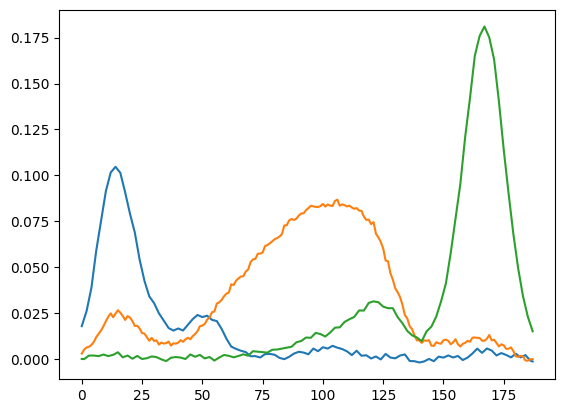

In [18]:
plt.figure()
plt.plot(dat_white_final)
# plt.plot(dat_from_black_mean)

In [19]:
crf = np.zeros(shape=(25, 3))

In [20]:
nm_idx_x = np.array([486,478,470,462,454,446,438,430,419,411,403,395,387,378,370,362,354,346,337,329,321,313,305,297, 289])
nm_idx_x = nm_idx_x - 292

In [21]:
import torch
wvl = torch.linspace(420, 660, 25)
# color = np.array(['R','G','B'])

In [22]:
wvl

tensor([420., 430., 440., 450., 460., 470., 480., 490., 500., 510., 520., 530.,
        540., 550., 560., 570., 580., 590., 600., 610., 620., 630., 640., 650.,
        660.])

In [23]:
for i in range(3):
    for j in range(25):
        if nm_idx_x[j] < 188:
            # print(f'{wvl[j]}nm {color[i]}', img[257,nm_idx_x[j],i])
            # crf[j, i] = (img[257,nm_idx_x[j],i] - min)/(max-min) * PE[j]
            crf[j, i] = (dat_white_final[nm_idx_x[j],i]) / PE[j]

In [24]:
import matplotlib.pyplot as plt

In [25]:
dat_white_final

array([[ 1.78225376e-02,  2.86869612e-03, -7.32433051e-05],
       [ 2.19363699e-02,  5.07820249e-03, -1.22072175e-04],
       [ 2.60502022e-02,  6.22568093e-03,  8.30090791e-04],
       [ 3.23735409e-02,  6.54306859e-03,  1.78225376e-03],
       [ 3.86968795e-02,  7.56847486e-03,  1.79446098e-03],
       [ 4.88410773e-02,  9.21644923e-03,  1.80666819e-03],
       [ 5.89852750e-02,  1.18410010e-02,  1.64797436e-03],
       [ 6.70664530e-02,  1.37087053e-02,  1.48928054e-03],
       [ 7.51476310e-02,  1.54909590e-02,  1.91653315e-03],
       [ 8.32654307e-02,  1.77859159e-02,  2.34378576e-03],
       [ 9.13832303e-02,  2.05081254e-02,  1.92874037e-03],
       [ 9.64492256e-02,  2.29861906e-02,  1.51369497e-03],
       [ 1.01515221e-01,  2.47684443e-02,  1.84328985e-03],
       [ 1.03077745e-01,  2.26688029e-02,  2.17288472e-03],
       [ 1.04640269e-01,  2.46463722e-02,  2.88090333e-03],
       [ 1.02967880e-01,  2.64896620e-02,  3.58892195e-03],
       [ 1.01295491e-01,  2.51346609e-02

In [26]:
PE

array([0.00045083, 0.00192969, 0.00646062, 0.0121806 , 0.00988155,
       0.00384551, 0.0012909 , 0.00158269, 0.00342962, 0.0048454 ,
       0.00536611, 0.00552526, 0.00547096, 0.00517708, 0.00465882,
       0.00409307, 0.00335211, 0.00229322, 0.00148828, 0.00177185,
       0.0041034 , 0.00914754, 0.00845859, 0.00202013, 0.00049117])

In [27]:
np.save('crf_dispersion.npy',crf)

In [28]:
crf[-1,2] = 0.08

In [32]:
crf.max()

24.177195174046183

In [33]:
from scipy.interpolate import interp1d

map_scale = interp1d([crf.min(), crf.max()], [0., 1.])
crf = torch.tensor(map_scale(crf).astype(np.float32))

In [35]:
np.save('crf_dispersion.npy',crf)

In [36]:
crf.shape

torch.Size([25, 3])

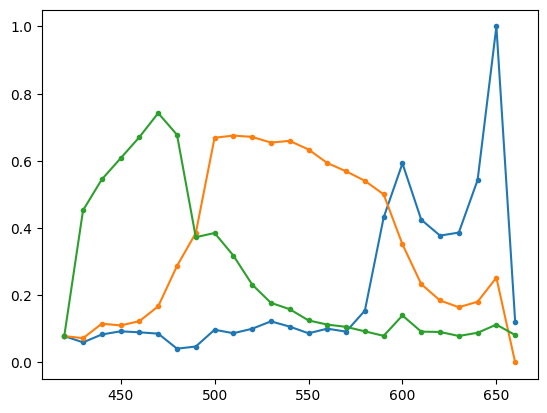

In [34]:
plt.plot(wvl, crf, '.-')